<a href="https://colab.research.google.com/github/aproca/MNIST_To_CIFAR10AdvRep/blob/master/MNIST_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import os


from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')


In [0]:
from sklearn.preprocessing import normalize
# Convert sklearn 'datasets bunch' object to Pandas DataFrames
y = pd.Series(mnist.target).astype('int').astype('category')
X = pd.DataFrame(mnist.data)

X.shape, y.shape

num_images = X.shape[1]
X.columns = ['pixel_'+str(x) for x in range(num_images)]

# print first row of X
X.head(1)

#X = normalize(X,norm='l1')


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]
253.0


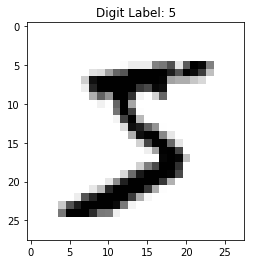

In [0]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# First row is first image
first_image = X.loc[0,:]
first_label = y[0]

# 784 columns correspond to 28x28 image
plottable_image = np.reshape(first_image.values, (28, 28))

#scaled_image = preprocessing.scale(plottable_image)

print(y[1:10])

#test
print(plottable_image[10][12])

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(first_label))
plt.show()

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_image = min_max_scaler.fit_transform(plottable_image)

In [0]:
def rounding_func(x):
  if x < 0.5:
    return 0
  else:
    return 1

  
rounding_func(0.6561264822134387)

1

In [0]:
def redefine_image(scaled_image):
  for row in range(len(scaled_image)):
    for column in range(len(scaled_image[row])):
      if scaled_image[row][column] != 0.0:
        x = scaled_image[row][column]
        scaled_image[row][column] = rounding_func(x)
        
   

In [0]:
""" Create mapping func """


def mapping_func(image,row, column):
  if row == 27 and column == 27:
    first = image[row][column]
    second = 0.0
    third = 0.0
    fourth = 0.0
  elif row == 27:
    first = image[row][column]
    second = image[row][column+1]
    third = 0.0
    fourth = 0.0
  elif column == 27:
    first = image[row][column]
    second = 0.0
    third = image[row+1][column]
    fourth = 0.0  
  else:
    first = image[row][column]
    second = image[row][column+1]
    third = image[row+1][column]
    fourth = image[row+1][column+1]

 
  
  if first == 0.0 and second == 0.0 and third == 0.0 and fourth == 0.0:
    return ord('p')
  
  
  first = rounding_func(first)
  second = rounding_func(second)
  third =  rounding_func(third)
  fourth =  rounding_func(fourth)
  
   
  if first == 1.0 and second == 0.0 and third == 0.0 and fourth == 0.0:
    return ord('a')
  elif first == 0.0 and second == 1.0 and third == 0.0 and fourth == 0.0:
    return ord('b')
  elif first == 0.0 and second == 0.0 and third == 1.0 and fourth == 0.0:
    return ord('c')
  elif first == 0.0 and second == 0.0 and third == 0.0 and fourth == 1.0:
    return ord('d')
  elif first == 1.0 and second == 1.0 and third == 0.0 and fourth == 0.0:
    return ord('e')
  elif first == 0.0 and second == 0.0 and third == 1.0 and fourth == 1.0:
    return ord('f')
  elif first == 1.0 and second == 0.0 and third == 1.0 and fourth == 0.0:
    return ord('g')
  elif first == 0.0 and second == 1.0 and third == 0.0 and fourth == 1.0:
    return ord('h')
  elif first == 0.0 and second == 0.0 and third == 0.0 and fourth == 0.0:
    return ord('i')
  elif first == 0.0 and second == 1.0 and third == 1.0 and fourth == 0.0:
    return ord('j')
  elif first == 1.0 and second == 1.0 and third == 1.0 and fourth == 0.0:
    return ord('k')
  elif first == 1.0 and second == 1.0 and third == 0.0 and fourth == 1.0:
    return ord('l')
  elif first == 0.0 and second == 1.0 and third == 1.0 and fourth == 1.0:
    return ord('m')
  elif first == 1.0 and second == 0.0 and third == 1.0 and fourth == 1.0:
    return ord('n')
  elif first == 1.0 and second == 1.0 and third == 1.0 and fourth == 1.0:
    return ord('o')
  else:
    return ord('q')
 



In [0]:
""" Better? Do rounding and """

sample = len(X)

all_image_chars = [] 

for im in range(len(0:10)):
  image_chars = []   
  #print(im)

  image = X.loc[im,:]
  label = y[im]
  
  #print("***",label)
  plottable_image = np.reshape(image.values, (28, 28))

  min_max_scaler = preprocessing.MinMaxScaler()
  scaled_image = min_max_scaler.fit_transform(plottable_image)
  
 
  
  for row in range(len(scaled_image)):
    for column in range(len(scaled_image[row])):
       #image_chars.append(int(mapping_func(scaled_image,row,column)))
        image_chars.append(mapping_func(scaled_image,row,column))
  
  image_chars.append(label)
  all_image_chars.append(image_chars)  
  
        
all_image_chars = np.array(all_image_chars)
#print(len(all_image_chars))

print(all_image_chars[0])

[112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 105 105 105
 105 105 100 102  99 100 102 102 102  99 112 112 112 112 112 112 112 112
 112 112 112 105 105 105 100 102 102 102 102 102 109 111 110 109 111 111
 111 103 112 112 112 112 112 112 112 112 112 112 105 100 102 102 109 111
 111 111 111 111 111 107 101 101 101 101 101  97 112 112 112 112 112 112
 112 112 112 112 105 104 111 111 111 111 111 111 111 111 111 103 105 105
 105 105 105 112 112 112 112 112 112 112 112 112 112 112 105  98 108 107
 108 111 111 107 101 101 108 103 112 112 112 112 11

In [0]:
len(all_image_chars)

70000

In [0]:
import pandas as pd 
#pd.DataFrame(all_image_chars).to_csv("mnist_ascii_70000_2.csv")
pd.DataFrame(all_image_chars[1:10000]).to_csv("mnist_language_test.csv", index = False)




In [0]:
from google.colab import files
files.download("mnist_language_test.csv")

In [0]:
from google.colab import files
files.download( "mnist_ascii_70000_2.csv" )  

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 37834, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
from sklearn.model_selection import train_test_split
import torch
train_file = 'https://raw.githubusercontent.com/dlatorre-mf/mnist-reprogramming-adv/master/mnist_language_new.csv'
datatrain = pd.read_csv(train_file)



print(datatrain.shape)




y = datatrain['784'].values
X = datatrain.drop(['784'],1).values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)


(6, 786)


TypeError: ignored